In [29]:
import pandas as pd
import re
import numpy as np
import html
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [30]:
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [31]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
text = " ".join(str(cat.split()) for cat in df.review)

In [5]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

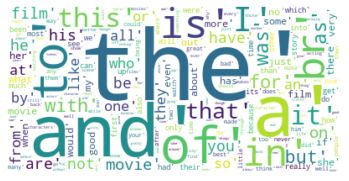

In [8]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [10]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

<AxesSubplot:xlabel='sentiment', ylabel='count'>

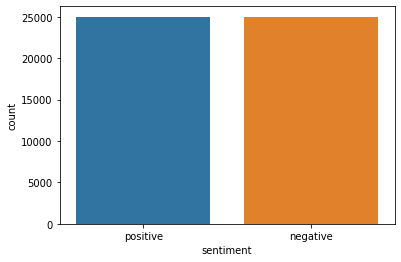

In [11]:
sns.countplot(x = df['sentiment'])

array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

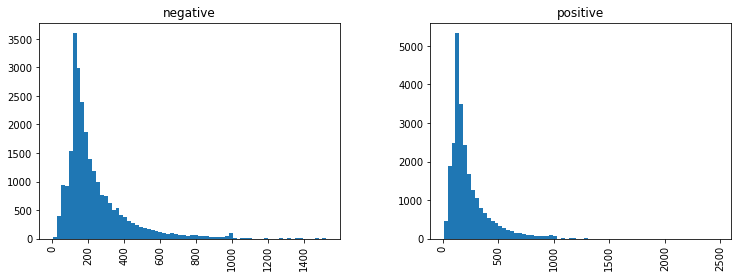

In [12]:

df['totalwords'] = df['review'].str.split().str.len()
df.hist(column='totalwords',by='sentiment',bins=70,figsize=(12,4))

In [14]:
X = df["review"]
y = df["sentiment"]

In [15]:
X.shape, y.shape

((50000,), (50000,))

In [32]:
for i in range(X.shape[0]):
#     df['review'][i] = re.sub('[^A-Za-z]', '', df['review'][i])
     # Escaping HTML characters
    df['review'][i] = html.unescape(df['review'][i])
    # Removal of URLs
    df['review'][i] = re.sub(r"http\S+", "", df['review'][i])
    # Removal of mentions
    df['review'][i] = re.sub("@[^\s]*", "", df['review'][i])
    # Removal of hashtags
    df['review'][i] = re.sub("#[^\s]*", "", df['review'][i])
    # Removal of numbers
    df['review'][i] = re.sub('[0-9]*[+-:]*[0-9]+', '', df['review'][i])
    # Convert to lowercase
    df['review'][i] = df['review'][i].lower()

In [35]:
for i in range(X.shape[0]):
    df['review'][i] = re.sub('[^A-Za-z]', ' ', df['review'][i])

In [36]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production   br    br   the...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s  love in the time of money  is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot  bad dialogue  bad acting  idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [37]:
df['review'][2000]

'stranded in space    mstk version   a very not good tv movie pilot  for a never to be made series  in which an astronaut finds himself trapped on earth s evil twin  having a planet of identical size and mass orbiting in the same plane as the earth  but on the opposite side of the sun  is a well worn sf chestnut   the idea is over  years old  having been invented by the ancient greeks  in this version the counter world is run as an orwellian  perfect  society  where  for totally inexplicable reasons  everyone speaks english and drives late model american cars  after escaping from his prisonlike hospital  the disruptive earthian is chased around not southern california by tv and bad movie stalwart cameron mitchell who  like his minions  wears double breasted suits and black polo neck jumpers   a stylishly evil combination which i fully intend to adopt if ever i become a totalitarian overlord  our hero escapes several times before ending up gazing at the alien world s three moons and won

In [18]:
import nltk

In [38]:
#tokenization

df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)

In [39]:
df

,review,sentiment,tokenized_text
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production br br the...,positive,"[a, wonderful, little, production, br, br, the..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there s a family where a little boy ...,negative,"[basically, there, s, a, family, where, a, lit..."
4,petter mattei s love in the time of money is...,positive,"[petter, mattei, s, love, in, the, time, of, m..."
...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[i, thought, this, movie, did, a, down, right,..."
49996,bad plot bad dialogue bad acting idiotic di...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,i am a catholic taught in parochial elementary...,negative,"[i, am, a, catholic, taught, in, parochial, el..."
49998,i m going to have to disagree with the previou...,negative,"[i, m, going, to, have, to, disagree, with, th..."


In [40]:
# removing stopwrods

stopwords = nltk.corpus.stopwords.words("english")

def stopwords_remove(text):
    text_cleaned = [word for word in text if word not in stopwords]
    return text_cleaned

df["tokenized_text"] = df["tokenized_text"].apply(lambda x: stopwords_remove(x))

In [41]:
df

,review,sentiment,tokenized_text
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,a wonderful little production br br the...,positive,"[wonderful, little, production, br, br, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there s a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter mattei s love in the time of money is...,positive,"[petter, mattei, love, time, money, visually, ..."
...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, creative, o..."
49996,bad plot bad dialogue bad acting idiotic di...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,i am a catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,i m going to have to disagree with the previou...,negative,"[going, disagree, previous, comment, side, mal..."


In [42]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

df['stemmed'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [43]:
df

,review,sentiment,tokenized_text,stemmed
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook..."
1,a wonderful little production br br the...,positive,"[wonderful, little, production, br, br, filmin...","[wonder, littl, product, br, br, film, techniq..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,basically there s a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi..."
4,petter mattei s love in the time of money is...,positive,"[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, creative, o...","[thought, movi, right, good, job, creativ, ori..."
49996,bad plot bad dialogue bad acting idiotic di...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,i am a catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ..."
49998,i m going to have to disagree with the previou...,negative,"[going, disagree, previous, comment, side, mal...","[go, disagre, previous, comment, side, maltin,..."


In [44]:
input2_corrected = [" ".join(x) for x in df['stemmed']]

from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(input2_corrected)

In [45]:
df

,review,sentiment,tokenized_text,stemmed
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook..."
1,a wonderful little production br br the...,positive,"[wonderful, little, production, br, br, filmin...","[wonder, littl, product, br, br, film, techniq..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,basically there s a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi..."
4,petter mattei s love in the time of money is...,positive,"[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, creative, o...","[thought, movi, right, good, job, creativ, ori..."
49996,bad plot bad dialogue bad acting idiotic di...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,i am a catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ..."
49998,i m going to have to disagree with the previou...,negative,"[going, disagree, previous, comment, side, mal...","[go, disagre, previous, comment, side, maltin,..."


In [46]:
tfidf_vectorizer_vectors

<50000x68144 sparse matrix of type '<class 'numpy.float64'>'
	with 4667097 stored elements in Compressed Sparse Row format>

In [47]:
tfidf_vectorizer_vectors.shape

(50000, 68144)

In [49]:
df

,review,sentiment,tokenized_text,stemmed
0,one of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook..."
1,a wonderful little production br br the...,1,"[wonderful, little, production, br, br, filmin...","[wonder, littl, product, br, br, film, techniq..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,basically there s a family where a little boy ...,2,"[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi..."
4,petter mattei s love in the time of money is...,1,"[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
49995,i thought this movie did a down right good job...,1,"[thought, movie, right, good, job, creative, o...","[thought, movi, right, good, job, creativ, ori..."
49996,bad plot bad dialogue bad acting idiotic di...,2,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,i am a catholic taught in parochial elementary...,2,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ..."
49998,i m going to have to disagree with the previou...,2,"[going, disagree, previous, comment, side, mal...","[go, disagre, previous, comment, side, maltin,..."


In [48]:
def dummies(x):
    if x == 'positive':
        return 1
    if x == 'negative':
        return 2

df['sentiment'] = df['sentiment'].apply(lambda x: dummies(x))

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectorizer_vectors, df['sentiment'], test_size=0.3, random_state=101)

**LOGISTIC REGRESSION**

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag')

lr.fit(X_train,y_train)

LogisticRegression(solver='sag')

In [52]:
logistic_predictions = lr.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,logistic_predictions))
print(classification_report(y_test,logistic_predictions))
print(accuracy_score(y_test, logistic_predictions))

[[6788  738]
 [ 928 6546]]
              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7526
           2       0.90      0.88      0.89      7474

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

0.8889333333333334


**NAIVE BAYES**

In [54]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(X_train, y_train)

MultinomialNB()

In [55]:
predicted = MNB.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(accuracy_score(y_test, predicted))

[[6346 1180]
 [ 935 6539]]
              precision    recall  f1-score   support

           1       0.87      0.84      0.86      7526
           2       0.85      0.87      0.86      7474

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

0.859


**DECISION TREE**

In [65]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
decisonTree = clf.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,decisonTree))
print(classification_report(y_test,decisonTree))
print(accuracy_score(y_test, decisonTree))

[[5466 2060]
 [2081 5393]]
              precision    recall  f1-score   support

           1       0.72      0.73      0.73      7526
           2       0.72      0.72      0.72      7474

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000

0.7239333333333333


**BERNOULLI NAIVE BAYES**

In [63]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

BNB.fit(X_train, y_train)

Predicted_BNB = BNB.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,Predicted_BNB))
print(classification_report(y_test,Predicted_BNB))
print(accuracy_score(y_test, Predicted_BNB))

[[6180 1346]
 [ 891 6583]]
              precision    recall  f1-score   support

           1       0.87      0.82      0.85      7526
           2       0.83      0.88      0.85      7474

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

0.8508666666666667
